In [86]:
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
import matplotlib.cm as cmap
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D

from mpl_toolkits.axisartist import SubplotHost

from mpl_toolkits.axisartist import GridHelperCurveLinear

import astropy.units as u

from astropy.coordinates import Angle

from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f9d4e873610>

In [95]:
def get_ra_matches_deg(matchfile, psr, plot=False):
    """
    
    """

    f = open(matchfile, 'r')
    ras = []

    if plot:
        for line in f:
            values = line.split(',')
            if values[0] == psr:
                ras.append(float(values[7]))

        return ras
    else:
        for line in f:
            values = line.split(',')
            if values[0] == psr:
                ras.append(Angle(float(values[7]), u.deg))

        return ras  

def get_ra_matches_hms(matchfile, psr, plot=False): 
    f = open(matchfile, 'r')
    ras = []

    if plot:
        for line in f:
            values = line.split(',')
            if values[0] == psr:
                ras.append(Angle(float(values[7]), u.deg).hour)

        return np.array(ras)
    else:
        for line in f:
            values = line.split(',')
            if values[0] == psr:
                ras.append(Angle(float(values[7]), u.deg).hour)

        return np.array(ras)

In [96]:
def get_dec_matches_deg(matchfile, psr, plot=False):
    """
    
    """

    f = open(matchfile, 'r')
    decs = []

    if plot:
        for line in f:
            values = line.split(',')
            if values[0] == psr:
                decs.append(float(values[9]))

        return decs
    else:
        for line in f:
            values = line.split(',')
            if values[0] == psr:
                decs.append(Angle(float(values[9]), u.deg))

        return decs

def get_dec_matches_dms(matchfile, psr, plot=False):
    f = open(matchfile, 'r')
    decs = []

    if plot:
        for line in f:
            values = line.split(',')
            if values[0] == psr:
                decs.append(Angle(float(values[9]), u.deg).dms)

        return np.array(decs)
    else:
        for line in f:
            values = line.split(',')
            if values[0] == psr:
                decs.append(Angle(float(values[9]), u.deg).dms)

        return np.array(decs)

In [97]:
def curvelinear_test2(fig):
    """ 
    
    """

    global ax1

    tr = Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()

    extreme_finder = angle_helper.ExtremeFinderCycle(10, 60, 
                                                    lon_cycle= 360,
                                                    lat_cycle= None,
                                                    lon_minmax= None,
                                                    lat_minmax= (0, np.inf),
                                                    )
    
    grid_locator1 = angle_helper.LocatorHMS(12)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = angle_helper.LocatorDMS(6)
    tick_formatter2 = angle_helper.FormatterDMS()

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder= extreme_finder,
                                        grid_locator1= grid_locator1,
                                        tick_formatter1= tick_formatter1,
                                        grid_locator2= grid_locator2,
                                        tick_formatter2= tick_formatter2)

    ax1 = SubplotHost(fig, 1, 1, 1, grid_helper= grid_helper)

    ax1.axis['right'].major_ticklabels.set_visible(True)
    ax1.axis['top'].major_ticklabels.set_visible(True)
    ax1.axis['bottom'].major_ticklabels.set_visible(True)

    ax1.axis['right'].get_helper().nth_coord_ticks=0
    ax1.axis['bottom'].get_helper().nth_coord_ticks=0

    fig.add_subplot(ax1)

    grid_helper = ax1.get_grid_helper()

    ax1.set_aspect(1.)
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)

    ax1.set_xlabel('Right Ascension')
    ax1.set_ylabel('90$^\circ$ + Declination')
    ax1.grid(True)

    return tr

[-72.09167476728746, -72.08171972473119, -72.07764141634007, -72.07003903935032, -72.07340208751677, -72.07216941089214, -72.07263431521403, -72.07075448522743, -72.10725906992899, -72.09664277932549, -72.10769460382745, -72.0564483462791, -72.07944258923942, -72.11182259914695, -72.06197618327748, -72.11047841190468, -72.07800004600128, -72.09570363379507, -72.11180749751179, -72.08250486670634, -72.07836405648389, -72.049868411724, -72.04913981834214, -72.11073425346018, -72.06915262287029, -72.05588021897746, -72.04438856958603, -72.10961714394942, -72.05138098337217, -72.10684041068664, -72.07234611442232, -72.12385278396755, -72.05969217197506, -72.0910060112024, -72.11629606401097, -72.06487931593117, -72.0404424527666, -72.12675571547975, -72.12675077693675, -72.12700938922823, -72.11544496952048, -72.12122234900585, -72.03802729639193, -72.12942088420202, -72.10698212423628, -72.03753707366903, -72.05313481013438, -72.12822580878294, -72.04334734841356, -72.12984575821388]
[0.0

<function matplotlib.pyplot.show(close=None, block=None)>

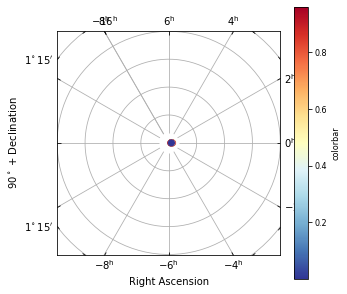

In [99]:
import matplotlib.pyplot as plt

fig = plt.figure(1,figsize= (5,5))
fig.clf()

tr = curvelinear_test2(fig) # tr

# this is the point at which I need to access the actual data. I am realizing that there is a standard way I go about
# this for each function and so I may as well write them into functions themselves 

decs = get_dec_matches_deg('testing_output.csv', 'J0024-7204Z', plot=True)
ras = get_ra_matches_hms('testing_output.csv', 'J0024-7204Z', plot=True)

print(decs)
print(ras)

# out_test = tr.transform(zip(ras, decs))
both = np.vstack((decs, ras))*u.deg
out_test = tr.transform(both)

cm = plt.cm.get_cmap('RdYlBu_r')
z = np.random.random((len(decs), 1))

with quantity_support():
    SC = ax1.scatter(out_test[:,0],
        out_test[:,1],
        c = z,
        cmap = cm,
        zorder = 9)

cbar = plt.colorbar(SC, shrink = 1., pad=0.05)
cbar.ax.tick_params(labelsize=8)
cbar.set_label('colorbar', fontsize=8)

plt.show